# Build decision tree by hand

This notebook shows how to build a decision tree by hand, in real business cases, buidling rules by hand is important as:
- It mostly leads to intuitive rules, which is super important in business that is highly regulated, such as financial industries
- No huge compromise on the accuracy as it can also be used along with other steps such as feature engineering, feature selection etc.

This flexbility is very valuable to real business use cases.

## Dependencies

In [1]:
# Install TensorFlow Dececision Forests.
!pip install tensorflow_decision_forests

# Use wurlitzer to show the training logs.
!pip install wurlitzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [2]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import collections

In [3]:
tf.__version__

'2.13.0'

In [4]:
tfdf.__version__

'1.5.0'

## Train a simple model

In [5]:
# Download the dataset
!wget -q https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -O /tmp/penguins.csv

# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("/tmp/penguins.csv")

In [6]:
dataset_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [7]:
dataset_df.value_counts('species')

species
Adelie       152
Gentoo       124
Chinstrap     68
dtype: int64

In [8]:
# Convert the pandas dataframe into a tf dataset.
dataset_tf = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="species")

In [9]:
# Train the Random Forest
model = tfdf.keras.CartModel()

Use /tmp/tmpb62jot2r as temporary training directory


In [10]:
model.fit(x=dataset_tf)

Reading training dataset...
Training dataset read in 0:00:10.498949. Found 344 examples.
Training model...
Model trained in 0:00:00.047641
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


Check the model summary

In [11]:
model.summary()

Model: "cart_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "flipper_length_mm"  1.000000 ################
    2.            "island"  0.416667 ##
    3.     "bill_depth_mm"  0.333333 
    4.    "bill_length_mm"  0.333333 

Variable Importance: NUM_AS_ROOT:
    1. "flipper_length_mm"  1.000000 

Variable Importance: NUM_NODES:
    1.     "bill_depth_mm"  1.000000 
    2.    "bill_length_mm"  1.000000 
    3. "flipper_length_mm"  1.000000 
    4.            "island"  1.000000 

Variable Importance: SUM_SCORE:
    1. "

### Plot the model

In [12]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=5)

### Inspect the model structure

In [13]:
inspector = model.make_inspector()

All available elements of the model that can be checked are as below:

In [14]:
[field for field in dir(inspector) if not field.startswith("_")]

['MODEL_NAME',
 'dataspec',
 'directory',
 'evaluation',
 'export_to_tensorboard',
 'extract_all_trees',
 'extract_tree',
 'features',
 'file_prefix',
 'header',
 'iterate_on_nodes',
 'label',
 'label_classes',
 'metadata',
 'model_type',
 'num_trees',
 'objective',
 'specialized_header',
 'task',
 'training_logs',
 'tuning_logs',
 'variable_importances',
 'winner_take_all_inference']

Some model meta-data

In [15]:
print("Model type:", inspector.model_type())
print("Number of trees:", inspector.num_trees())
print("Objective:", inspector.objective())
print("Input features:", inspector.features())

Model type: RANDOM_FOREST
Number of trees: 1
Objective: Classification(label=__LABEL, class=None, num_classes=3)
Input features: ["bill_depth_mm" (1; #1), "bill_length_mm" (1; #2), "body_mass_g" (1; #3), "flipper_length_mm" (1; #4), "island" (4; #5), "sex" (4; #6), "year" (1; #7)]


### Variable importance

In [16]:
print(f"Available variable importances types:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances types:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES
	 SUM_SCORE


Different variable importances have different semantics. For example, a feature with a mean decrease in auc of 0.05 means that removing this feature from the training dataset would reduce/hurt the AUC by 5%.

In [17]:
# Mean decrease in AUC of the class 1 vs the others.
inspector.variable_importances()["SUM_SCORE"]

[("flipper_length_mm" (1; #4), 168.5170418024063),
 ("bill_length_mm" (1; #2), 62.107166051864624),
 ("island" (4; #5), 45.86299479007721),
 ("bill_depth_mm" (1; #1), 23.505893290042877)]

#### Plot the variable importance

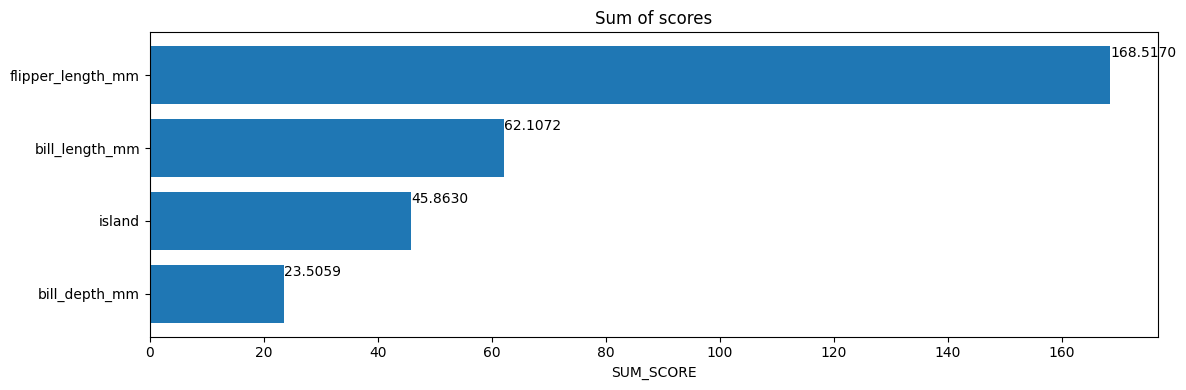

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "SUM_SCORE"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("Sum of scores")
plt.tight_layout()
plt.show()

### Inspect a actual tree

In [19]:
sample_tree = inspector.extract_tree(tree_idx=0)
sample_tree

Tree(root=NonLeafNode(condition=(flipper_length_mm >= 206.5; miss=False, score=0.5436033606529236), pos_child=NonLeafNode(condition=(bill_depth_mm >= 17.649999618530273; miss=False, score=0.2061920464038849), pos_child=LeafNode(value=ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0), idx=4), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 1.0],n=108.0), idx=3), value=ProbabilityValue([0.017543859649122806, 0.03508771929824561, 0.9473684210526315],n=114.0)), neg_child=NonLeafNode(condition=(island in ['Biscoe', 'Torgersen']; miss=True, score=0.23399487137794495), pos_child=LeafNode(value=ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0), idx=2), neg_child=NonLeafNode(condition=(bill_length_mm >= 42.349998474121094; miss=True, score=0.5646106004714966), pos_child=LeafNode(value=ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.9795918367346939, 0.02040816326530612, 

In [20]:
print(sample_tree.pretty())

(flipper_length_mm >= 206.5; miss=False, score=0.5436033606529236)
    ├─(pos)─ (bill_depth_mm >= 17.649999618530273; miss=False, score=0.2061920464038849)
    │        ├─(pos)─ ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0) (idx=4)
    │        └─(neg)─ ProbabilityValue([0.0, 0.0, 1.0],n=108.0) (idx=3)
    └─(neg)─ (island in ['Biscoe', 'Torgersen']; miss=True, score=0.23399487137794495)
             ├─(pos)─ ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0) (idx=2)
             └─(neg)─ (bill_length_mm >= 42.349998474121094; miss=True, score=0.5646106004714966)
                      ├─(pos)─ ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0) (idx=1)
                      └─(neg)─ ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.0) (idx=0)



### Fine-tune nodes

In [21]:
[field for field in dir(sample_tree) if not field.startswith("_")]

['label_classes', 'pretty', 'root']

In [22]:
[field for field in dir(sample_tree.root) if not field.startswith("_")]

['condition', 'neg_child', 'pos_child', 'pretty', 'scan_structure', 'value']

In [23]:
sample_tree.root

NonLeafNode(condition=(flipper_length_mm >= 206.5; miss=False, score=0.5436033606529236), pos_child=NonLeafNode(condition=(bill_depth_mm >= 17.649999618530273; miss=False, score=0.2061920464038849), pos_child=LeafNode(value=ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0), idx=4), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 1.0],n=108.0), idx=3), value=ProbabilityValue([0.017543859649122806, 0.03508771929824561, 0.9473684210526315],n=114.0)), neg_child=NonLeafNode(condition=(island in ['Biscoe', 'Torgersen']; miss=True, score=0.23399487137794495), pos_child=LeafNode(value=ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0), idx=2), neg_child=NonLeafNode(condition=(bill_length_mm >= 42.349998474121094; miss=True, score=0.5646106004714966), pos_child=LeafNode(value=ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.

In [24]:
# Create some alias
Tree = tfdf.py_tree.tree.Tree
SimpleColumnSpec = tfdf.py_tree.dataspec.SimpleColumnSpec
ColumnType = tfdf.py_tree.dataspec.ColumnType
# Nodes
NonLeafNode = tfdf.py_tree.node.NonLeafNode
LeafNode = tfdf.py_tree.node.LeafNode
# Conditions
NumericalHigherThanCondition = tfdf.py_tree.condition.NumericalHigherThanCondition
CategoricalIsInCondition = tfdf.py_tree.condition.CategoricalIsInCondition
# Leaf values
ProbabilityValue = tfdf.py_tree.value.ProbabilityValue

In [25]:
sample_tree = inspector.extract_tree(tree_idx=0)
print(sample_tree)

(flipper_length_mm >= 206.5; miss=False, score=0.5436033606529236)
    ├─(pos)─ (bill_depth_mm >= 17.649999618530273; miss=False, score=0.2061920464038849)
    │        ├─(pos)─ ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0) (idx=4)
    │        └─(neg)─ ProbabilityValue([0.0, 0.0, 1.0],n=108.0) (idx=3)
    └─(neg)─ (island in ['Biscoe', 'Torgersen']; miss=True, score=0.23399487137794495)
             ├─(pos)─ ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0) (idx=2)
             └─(neg)─ (bill_length_mm >= 42.349998474121094; miss=True, score=0.5646106004714966)
                      ├─(pos)─ ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0) (idx=1)
                      └─(neg)─ ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.0) (idx=0)



In [26]:
sample_tree.root.pos_child.condition = NumericalHigherThanCondition(
                feature=SimpleColumnSpec(name="bill_depth_mm", type=ColumnType.NUMERICAL),
                threshold=17.5,
                missing_evaluation=False)

In [28]:
sample_tree.root

NonLeafNode(condition=(flipper_length_mm >= 206.5; miss=False, score=0.5436033606529236), pos_child=NonLeafNode(condition=(bill_depth_mm >= 17.5; miss=False, score=None), pos_child=LeafNode(value=ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0), idx=4), neg_child=LeafNode(value=ProbabilityValue([0.0, 0.0, 1.0],n=108.0), idx=3), value=ProbabilityValue([0.017543859649122806, 0.03508771929824561, 0.9473684210526315],n=114.0)), neg_child=NonLeafNode(condition=(island in ['Biscoe', 'Torgersen']; miss=True, score=0.23399487137794495), pos_child=LeafNode(value=ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0), idx=2), neg_child=NonLeafNode(condition=(bill_length_mm >= 42.349998474121094; miss=True, score=0.5646106004714966), pos_child=LeafNode(value=ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0), idx=1), neg_child=LeafNode(value=ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.0), idx=0), value=Probabilit

## Traverse the tree with recursion

In [38]:
def inorderTraversal(root):
    answer = []

    inorderTraversalUtil(root, answer)
    return answer

def inorderTraversalUtil(root, answer):

    if root is None:
        return

    # if this is a leaf node, just return the value, otherwise, continue the traversal
    if isinstance(root, LeafNode):
      answer.append(root.value)
    else:

      inorderTraversalUtil(root.pos_child, answer)
      answer.append(root.value)
      inorderTraversalUtil(root.neg_child, answer)
    return

In [45]:
def inorderTraversal(root, mode):
    answer = []

    inorderTraversalUtil(root, answer, mode)
    return answer

def inorderTraversalUtil(root, answer, mode):

    if mode == 'all':

        if root is None:
            return

        # if this is a leaf node, just return the value, otherwise, continue the traversal
        if isinstance(root, LeafNode):
          answer.append(root.value)
        else:

          inorderTraversalUtil(root.pos_child, answer, mode)
          answer.append(root.value)
          inorderTraversalUtil(root.neg_child, answer, mode)
        return
    elif mode == 'leaf':

        if root is None:
            return

        # if this is a leaf node, just return the value, otherwise, continue the traversal

        if isinstance(root, LeafNode):
          answer.append(root.value)
        else:

          inorderTraversalUtil(root.pos_child, answer, mode)
          inorderTraversalUtil(root.neg_child, answer, mode)
        return


In [40]:
all_nodes = inorderTraversal(sample_tree.root)
len(all_nodes)

9

In [46]:
all_leaves = inorderTraversal(sample_tree.root, mode="leaf")
len(all_leaves)

5

In [47]:
all_leaves

[ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0),
 ProbabilityValue([0.0, 0.0, 1.0],n=108.0),
 ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0),
 ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0),
 ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.0)]

In [41]:
all_nodes

[ProbabilityValue([0.3333333333333333, 0.6666666666666666, 0.0],n=6.0),
 ProbabilityValue([0.017543859649122806, 0.03508771929824561, 0.9473684210526315],n=114.0),
 ProbabilityValue([0.0, 0.0, 1.0],n=108.0),
 ProbabilityValue([0.43870967741935485, 0.2064516129032258, 0.3548387096774194],n=310.0),
 ProbabilityValue([0.9767441860465116, 0.0, 0.023255813953488372],n=86.0),
 ProbabilityValue([0.6836734693877551, 0.30612244897959184, 0.01020408163265306],n=196.0),
 ProbabilityValue([0.03278688524590164, 0.9672131147540983, 0.0],n=61.0),
 ProbabilityValue([0.45454545454545453, 0.5454545454545454, 0.0],n=110.0),
 ProbabilityValue([0.9795918367346939, 0.02040816326530612, 0.0],n=49.0)]

## Build a decision tree by hand

This section shows how to create a tree model by hand and the model can also be used as a regular tree model just as built above.

### Create the model builder

In [ ]:
!rm -rf /tmp/manual_model

In [ ]:
model_trial_idx = 1

In [ ]:
def copy_model_sig(m):
  """
  Copy the model signature to a new model.
  """
  spec = m.save_spec()[0][0]
  return lambda insp: spec

In [ ]:
# Create the model builder

model_trial_idx += 1
model_path = f"/tmp/manual_model/{model_trial_idx}"

builder = tfdf.builder.CARTBuilder(
    path=model_path,
    objective=tfdf.py_tree.objective.ClassificationObjective(
        label="species", classes=["Adelie", "Gentoo", "Chinstrap"]),
    input_signature_example_fn=copy_model_sig(model)
)

**Note:** The tree object (tfdf.py_tree.tree.Tree) is the same as the one returned by extract_tree() in the previous section.

In [ ]:
builder.add_tree(sample_tree)

In [ ]:
# builder.add_tree(
#     Tree(
#         NonLeafNode(
#             condition=NumericalHigherThanCondition(
#                 feature=SimpleColumnSpec(name="bill_length_mm", type=ColumnType.NUMERICAL),
#                 threshold=40.0,
#                 missing_evaluation=False),

#             pos_child=NonLeafNode(
#                 condition=CategoricalIsInCondition(
#                     feature=SimpleColumnSpec(name="island",type=ColumnType.CATEGORICAL),
#                     mask=["Dream", "Torgersen"],
#                     missing_evaluation=False)
#                 ,pos_child=LeafNode(value=ProbabilityValue(probability=[0.8, 0.2], num_examples=10))
#                 ,neg_child=LeafNode(value=ProbabilityValue(probability=[0.1, 0.9], num_examples=20))
#                 ),

#             neg_child=LeafNode(value=ProbabilityValue(probability=[0.2, 0.8], num_examples=30))
#             )
#         )

#     )

Finalize the tree development by closing it.

In [ ]:
builder.close()

Now can open the model as a regular keras model, and make predictions

In [ ]:
manual_model = tf.keras.models.load_model(model_path)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(manual_model)

In [ ]:
manual_model.predict(dataset_tf)

1/1 [==============================] - 0s 288ms/step


array([[0.9767442 , 0.        , 0.02325581],
       [0.9767442 , 0.        , 0.02325581],
       [0.9767442 , 0.        , 0.02325581],
       ...,
       [0.03278688, 0.9672131 , 0.        ],
       [0.33333334, 0.6666667 , 0.        ],
       [0.03278688, 0.9672131 , 0.        ]], dtype=float32)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(manual_model)